In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,classification_report,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model as lm
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=10,8

import warnings
warnings.filterwarnings('ignore')

# Data loaded

In [2]:
df = pd.read_csv(r'DryBean_Data.csv')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
df.sample(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
4214    68367   1017.312       388.045873       228.122327      1.701043   
7107    60658    987.242       410.538607       190.220112      2.158229   
56      32368    675.385       221.658065       186.176229      1.190582   
3696   182178   1655.890       635.919575       368.338607      1.726454   
3497   159200   1537.846       577.679931       354.211381      1.630890   
518     36473    690.992       232.636725       199.749668      1.164641   
10163   23811    571.519       198.335175       153.293915      1.293823   
11728   31505    656.192       233.155281       172.412829      1.352308   
464     36136    711.044       234.639328       196.277830      1.195445   
12906   36529    710.141       264.936380       176.314452      1.502636   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
4214       0.808952       70183     295.038248  0.800288  0.974125   0.830134   
7107       0.886179       61495     277.906755  0.738741  0.986389   0.782079   
56         0.542702       32806     203.007925  0.759099  0.986649   0.891709   
3696       0.815170      183979     481.618349  0.796302  0.990211   0.834916   
3497       0.789957      162095     450.221874  0.803067  0.982140   0.845916   
518        0.512590       36858     215.496789  0.785531  0.989555   0.959921   
10163      0.634524       24175     174.118083  0.751539  0.984943   0.916065   
11728      0.673182       31932     200.283329  0.735703  0.986628   0.919449   
464        0.547954       36663     214.498914  0.775584  0.985626   0.898167   
12906      0.746400       36928     215.662160  0.684282  0.989195   0.910245   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
4214      0.760318      0.005676      0.001170      0.578083      0.983345   
7107      0.676932      0.006768      0.000877      0.458237      0.988981   
56        0.915861      0.006848      0.002972      0.838801      0.998661   
3696      0.757357      0.003491      0.000708      0.573590      0.990277   
3497      0.779362      0.003629      0.000826      0.607405      0.990612   
518       0.926323      0.006378      0.002897      0.858075      0.999349   
10163     0.877898      0.008330      0.003052      0.770705      0.997156   
11728     0.859013      0.007401      0.002486      0.737903      0.997872   
464       0.914164      0.006493      0.002797      0.835697      0.999029   
12906     0.814015      0.007253      0.001964      0.662620      0.995677   

          Class  
4214       CALI  
7107      HOROZ  
56        SEKER  
3696     BOMBAY  
3497     BOMBAY  
518       SEKER  
10163  DERMASON  
11728  DERMASON  
464       SEKER  
12906  DERMASON

In [4]:
print("The shape of the data is (row,column): "+str(df.shape))

The shape of the data is (row,column): (13611, 17)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [7]:
#checking out the statistical parameters
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [8]:
#checking out the categories and their respective counts in each feature

print("Class:")
print("="*40)
print(df.Class.value_counts(),sep='\n')
print("="*40)

Class:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [9]:
DERMASON=df[df['Class']=="DERMASON"]
DERMASON.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
10065  20420    524.932       183.601165       141.886215      1.294003   
10066  20464    528.408       191.249312       136.368462      1.402445   
10067  20548    524.736       183.965251       142.672388      1.289424   
10068  20711    525.413       186.079149       142.081680      1.309663   
10069  20786    534.717       200.927241       132.143553      1.520522   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
10065      0.634655       20684     161.243764  0.790187  0.987237   0.931235   
10066      0.701123       20772     161.417391  0.747407  0.985172   0.921004   
10067      0.631299       20825     161.748342  0.759686  0.986699   0.937773   
10068      0.645743       20988     162.388621  0.793525  0.986802   0.942778   
10069      0.753307       21057     162.682381  0.789412  0.987130   0.913551   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
10065     0.878228      0.008991      0.003299      0.771285      0.998045   
10066     0.844016      0.009346      0.002925      0.712362      0.999049   
10067     0.879233      0.008953      0.003300      0.773051      0.996791   
10068     0.872686      0.008985      0.003214      0.761580      0.997414   
10069     0.809658      0.009666      0.002562      0.655546      0.996773   

          Class  
10065  DERMASON  
10066  DERMASON  
10067  DERMASON  
10068  DERMASON  
10069  DERMASON

In [10]:
DERMASON.to_csv('DERMASON.csv')

In [11]:
SIRA=df[df['Class']=="SIRA"]
SIRA.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
7429  31519    676.641       255.073562       157.802740      1.616408   
7430  31751    671.914       244.102719       168.522491      1.448487   
7431  32857    668.106       233.804968       179.500919      1.302528   
7432  33180    670.488       240.969501       175.645040      1.371912   
7433  33206    680.423       260.089827       163.102720      1.594638   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
7429      0.785662       32065     200.327824  0.758033  0.982972   0.865099   
7430      0.723451       32462     201.063743  0.694284  0.978097   0.883771   
7431      0.640764       33185     204.535649  0.775569  0.990116   0.925011   
7432      0.684610       33564     205.538532  0.774835  0.988559   0.927479   
7433      0.778938       33583     205.619047  0.752663  0.988774   0.901298   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
7429     0.785373      0.008093      0.001899      0.616810      0.997017   
7430     0.823685      0.007688      0.002183      0.678457      0.982736   
7431     0.874813      0.007116      0.002571      0.765298      0.996822   
7432     0.852965      0.007262      0.002371      0.727549      0.998133   
7433     0.790569      0.007833      0.001887      0.625000      0.996649   

     Class  
7429  SIRA  
7430  SIRA  
7431  SIRA  
7432  SIRA  
7433  SIRA

In [12]:
SIRA.to_csv('SIRA.csv')

# Data Cleaning:
Checking for missing values.
First lets check it visually

In [13]:
import missingno as msno

<AxesSubplot:>

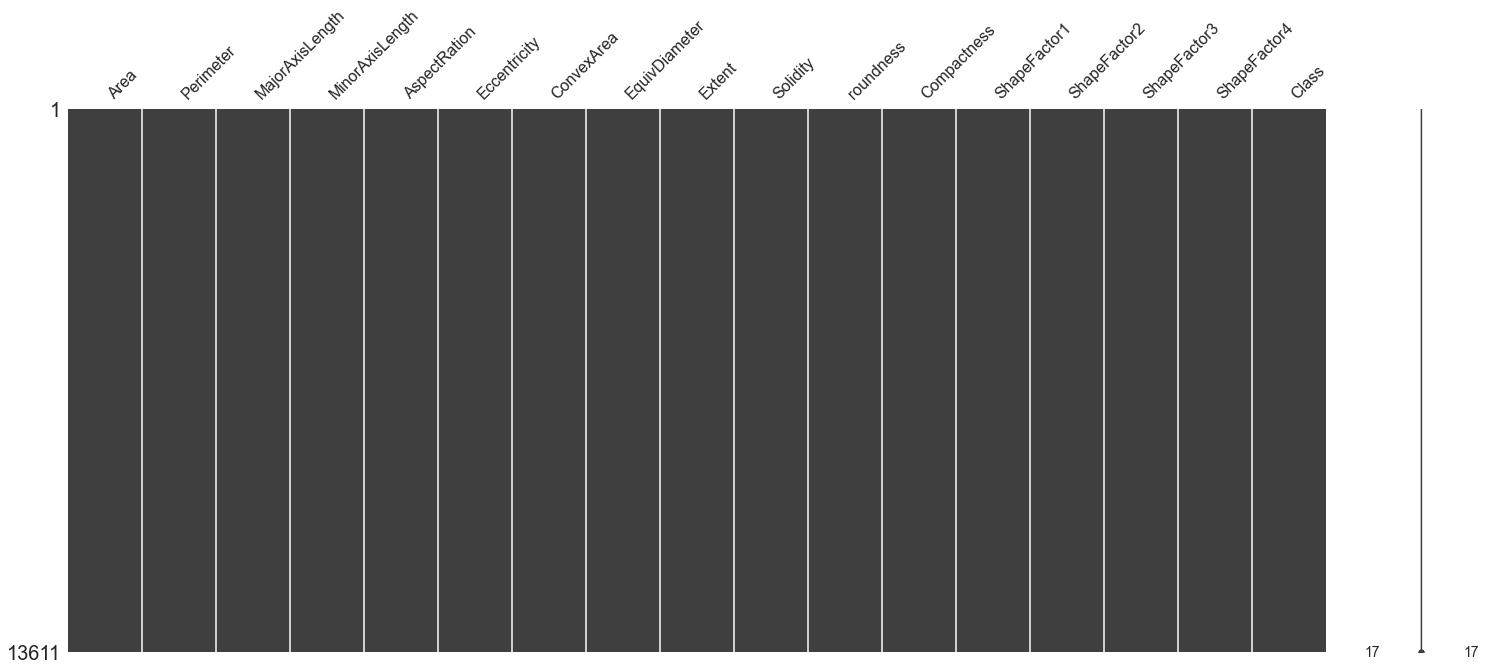

In [14]:
msno.matrix(df)

In [15]:
print("Data columns with null values: ",df.isnull().sum(),sep='\n')

Data columns with null values: 
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# Data Visualization

In [16]:
import plotly.express as px 

In [17]:
fig = px.box(df,x="Class", y ="Area" , color="Class")
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [18]:
fig = px.histogram(df,x="Class",color="Class",title='Class Bar Chart')
fig.show()

# Correlation plot of attributes:

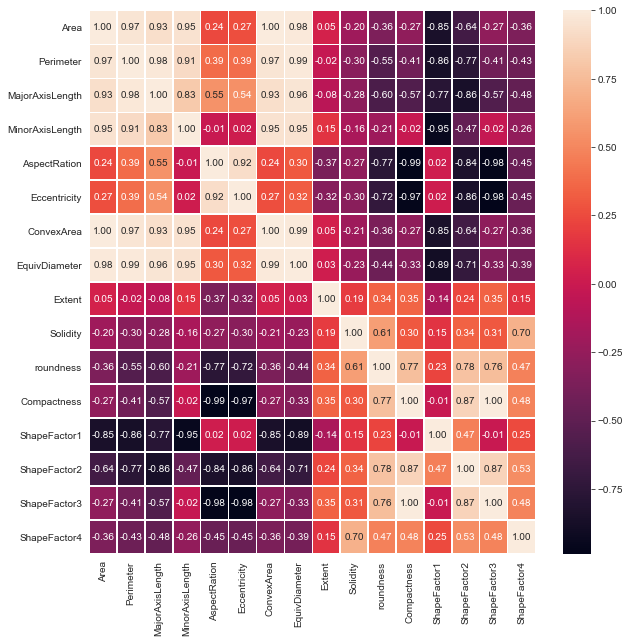

In [19]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="white",fmt=".2f",ax=ax)
plt.show()

# Feature Engineering:

<AxesSubplot:>

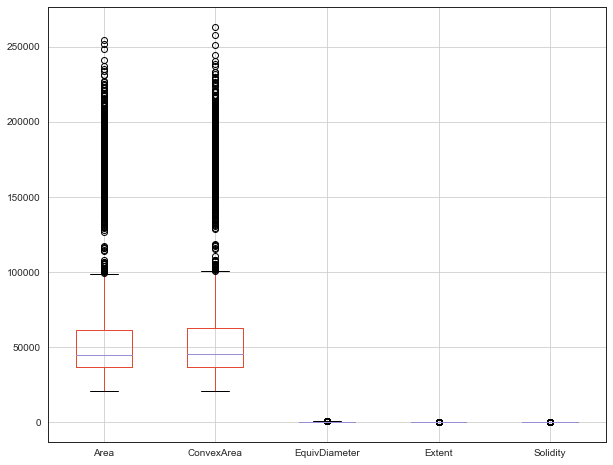

In [20]:
#checking the outlier of features
df.boxplot(column=['Area','ConvexArea','EquivDiameter','Extent','Solidity'])

In [21]:
#Checking Area of handling outliers 

q1 = np.percentile(df['Area'],25)
q3 = np.percentile(df['Area'],75)

IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['Area']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
        
print(outlier)

[100846, 102015, 102379, 105542, 115967, 114004, 117034, 126503, 128118, 129409, 129807, 130070, 131249, 131488, 132254, 132399, 132851, 132889, 133760, 134012, 134251, 135222, 135403, 135898, 137075, 137115, 137358, 137518, 137748, 137890, 138059, 138114, 138244, 138265, 138659, 138777, 138976, 139523, 139639, 139686, 139841, 140313, 140867, 140964, 141385, 141519, 141850, 141953, 142154, 142238, 142399, 142592, 143603, 144058, 144079, 144083, 144404, 144458, 144704, 145163, 145285, 145339, 145886, 146007, 146015, 146153, 146154, 146328, 146521, 146618, 146862, 146976, 147030, 147044, 147218, 147288, 147827, 147930, 148325, 148827, 148931, 149231, 149264, 149462, 149824, 149941, 150168, 150169, 150467, 150648, 150664, 150738, 151012, 151014, 151091, 151590, 151876, 152063, 152089, 152533, 152816, 152869, 152884, 152952, 153075, 153237, 153261, 153287, 153644, 153885, 153971, 154029, 154160, 154364, 154568, 154706, 154721, 154727, 154772, 154875, 155088, 155247, 155333, 155439, 155524,

In [22]:
#Checking ConvexArea of handling outliers 
q1 = np.percentile(df['ConvexArea'],25)
q3 = np.percentile(df['ConvexArea'],75)

IQR = q3-q1

low=q1-1.5*IQR
up =q3+1.5*IQR

outlier=[]
for x in df['ConvexArea']:
    if((x>up)) or ((x<low)):
        outlier.append(x)
        
print(outlier)

[102015, 103901, 104111, 107112, 118497, 115298, 118019, 128220, 129274, 130688, 131148, 131860, 132831, 132905, 133553, 133434, 134466, 134325, 135151, 135500, 135409, 136192, 137618, 137538, 139517, 138970, 138093, 139153, 138869, 139207, 143275, 139491, 139249, 139739, 139826, 140144, 140912, 140892, 140541, 141092, 141672, 141966, 142672, 142173, 143530, 143783, 143680, 143704, 143074, 143764, 143783, 144325, 145400, 145734, 146415, 145241, 145991, 146010, 145929, 146814, 146709, 147256, 147342, 147648, 147529, 149267, 148196, 149274, 150261, 148342, 148492, 148762, 148198, 148317, 148914, 149204, 148921, 149429, 149846, 153846, 149919, 150684, 151608, 152402, 151188, 152636, 151809, 151971, 152958, 153091, 152581, 152131, 153816, 152434, 153478, 153708, 153869, 153860, 154964, 154915, 154914, 154271, 154335, 155498, 154335, 155159, 154519, 155347, 157005, 156047, 155410, 157183, 155782, 155283, 156202, 156085, 155903, 156062, 156330, 157383, 156676, 157360, 156942, 158204, 159126,

In [23]:
features = ['Area','ConvexArea']
for cols in features:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    filter = (df[cols]>=Q1-1.5*IQR)&(df[cols]<=Q3 + 1.5*IQR)
    df=df.loc[filter]

Text(0.5, 1.0, 'ConvexArea')

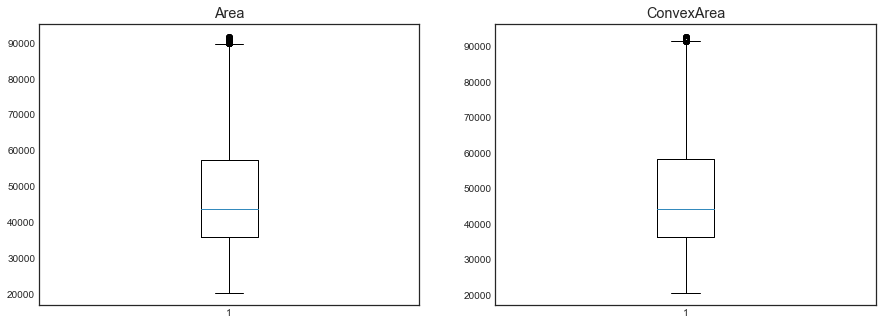

In [24]:
plt.figure(figsize=(15,30))
plt.style.use('seaborn-white')

ax=plt.subplot(521)
plt.boxplot(df['Area'])
ax.set_title('Area')

ax=plt.subplot(522)
plt.boxplot(df['ConvexArea'])
ax.set_title('ConvexArea')

# Let's print values in object columns to see data values.

In [25]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print({column:df[column].unique()})

In [26]:
print_unique_col_values(df)

{'Class': array(['SEKER', 'BARBUNYA', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)}


# Encoding:
Encoding the categories in month to the respective numbers.(Label Encoding)

In [27]:
Class_dict={'SEKER':0, 'BARBUNYA':1, 'CALI':2, 'HOROZ':3, 'SIRA':4, 'DERMASON':5}
df['Class']=df['Class'].map(Class_dict)

In [28]:
df[df['Class']==1]

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2027  41487    815.900       299.046841       177.081490      1.688753   
2028  41488    759.552       283.142777       186.985489      1.514250   
2029  42012    809.770       266.700396       202.381088      1.317813   
2030  43122    838.186       296.404589       185.657600      1.596512   
2031  43145    799.426       273.402945       201.266886      1.358410   
...     ...        ...              ...              ...           ...   
3311  90494   1208.656       427.673134       270.200661      1.582798   
3312  90508   1206.111       414.411454       278.942451      1.485652   
3313  90599   1182.444       432.954489       266.980084      1.621673   
3315  90639   1168.399       405.808977       286.542137      1.416228   
3317  91010   1196.528       428.462841       271.012131      1.580973   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2027      0.805826       42483     229.832306  0.689176  0.976555   0.783156   
2028      0.750920       42005     229.835076  0.708434  0.987692   0.903686   
2029      0.651285       43087     231.281949  0.770976  0.975050   0.805119   
2030      0.779530       44074     234.317382  0.731986  0.978400   0.771308   
2031      0.676813       43812     234.379863  0.766123  0.984776   0.848367   
...            ...         ...            ...       ...       ...        ...   
3311      0.775138       92071     339.441511  0.686288  0.982872   0.778438   
3312      0.739547       92011     339.467767  0.710424  0.983665   0.781848   
3313      0.787240       91961     339.638380  0.754614  0.985189   0.814277   
3315      0.708111       92250     339.713348  0.780590  0.982537   0.834339   
3317      0.774542       92343     340.407889  0.699259  0.985565   0.798828   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
2027     0.768550      0.007208      0.001551      0.590668      0.997493   
2028     0.811729      0.006825      0.001828      0.658903      0.997744   
2029     0.867198      0.006348      0.002215      0.752032      0.991037   
2030     0.790532      0.006874      0.001656      0.624941      0.997726   
2031     0.857269      0.006337      0.002111      0.734910      0.998309   
...           ...           ...           ...           ...           ...   
3311     0.793694      0.004726      0.001157      0.629950      0.997083   
3312     0.819156      0.004579      0.001272      0.671017      0.996898   
3313     0.784467      0.004779      0.001116      0.615388      0.997958   
3315     0.837126      0.004477      0.001356      0.700780      0.992465   
3317     0.794486      0.004708      0.001157      0.631209      0.997924   

      Class  
2027      1  
2028      1  
2029      1  
2030      1  
2031      1  
...     ...  
3311      1  
3312      1  
3313      1  
3315      1  
3317      1  

[1289 rows x 17 columns]

In [29]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64
dtype: object

<AxesSubplot:>

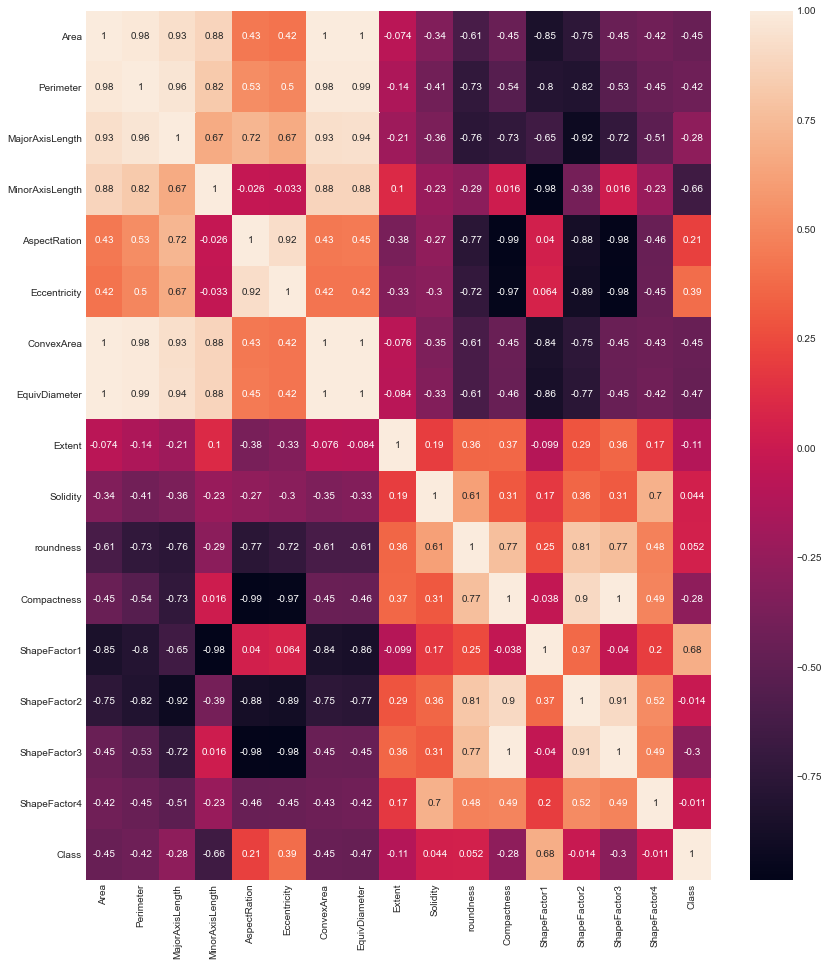

In [30]:
plt.figure(figsize=(14,16))
sns.heatmap(df.corr(),annot=True)

In [31]:
for col in df:
    print({col:df[col].unique()})

{'Area': array([28395, 28734, 29380, ..., 42139, 42147, 42159])}
{'Perimeter': array([610.291, 638.018, 624.11 , ..., 759.321, 763.779, 772.237])}
{'MajorAxisLength': array([208.1781167, 200.5247957, 212.8261299, ..., 281.5399279,
       283.3826364, 295.142741 ])}
{'MinorAxisLength': array([173.888747 , 182.7344194, 175.9311426, ..., 191.1879789,
       190.2757308, 182.2047159])}
{'AspectRation': array([1.19719142, 1.09735646, 1.20971266, ..., 1.47258175, 1.48932623,
       1.61984139])}
{'Eccentricity': array([0.54981219, 0.41178525, 0.56272732, ..., 0.73406478, 0.74105479,
       0.78669302])}
{'ConvexArea': array([28715, 29172, 29690, ..., 42494, 42667, 42600])}
{'EquivDiameter': array([190.1410973, 191.2727505, 193.4109041, ..., 231.6312612,
       231.6532475, 231.6862231])}
{'Extent': array([0.76392252, 0.78396813, 0.77811325, ..., 0.72993244, 0.70538912,
       0.7889625 ])}
{'Solidity': array([0.988856  , 0.9849856 , 0.98955877, ..., 0.98989875, 0.98781259,
       0.98964789]

In [32]:
df1=df
df1.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      0  
1     0.953861      0.006979      0.003564      0.909851      0.998430      0  
2     0.908774      0.007244      0.003048      0.825871      0.999066      0  
3     0.928329      0.007017      0.003215      0.861794      0.994199      0  
4     0.970516      0.006697      0.003665      0.941900      0.999166      0

# Feature Scaling:

In [33]:
cols_to_scale=['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [35]:
for col in df1:
    print({col: df1[col].unique()})

{'Area': array([0.11180272, 0.11655521, 0.12561159, ..., 0.30448192, 0.30459408,
       0.30476231])}
{'Perimeter': array([0.1113319 , 0.14741277, 0.12931443, ..., 0.3052632 , 0.31106435,
       0.32207067])}
{'MajorAxisLength': array([0.08212014, 0.05654773, 0.09765076, ..., 0.32724744, 0.33340457,
       0.37269917])}
{'MinorAxisLength': array([0.28670863, 0.33607265, 0.29810639, ..., 0.38324845, 0.37815757,
       0.33311659])}
{'AspectRation': array([0.12261211, 0.05157739, 0.13152124, ..., 0.31855826, 0.33047232,
       0.42333667])}
{'Eccentricity': array([0.47779703, 0.27847201, 0.4964478 , ..., 0.74387663, 0.75397091,
       0.81987719])}
{'ConvexArea': array([0.11147819, 0.1178218 , 0.12501215, ..., 0.30274427, 0.30514568,
       0.30421565])}
{'EquivDiameter': array([0.16005425, 0.16632217, 0.1781648 , ..., 0.38985668, 0.38997846,
       0.3901611 ])}
{'Extent': array([0.67102371, 0.73550396, 0.71667069, ..., 0.56168866, 0.48274074,
       0.75156921])}
{'Solidity': array([0.

# Train Test Split

In [36]:
X=df1.drop('Class',axis=1)
y=df1['Class']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=7)

In [38]:
print("Input Training",X_train.shape)
print("Input Test",X_test.shape)
print("="*30)
print("Output Training",y_train.shape)
print("Output Test",y_test.shape)


Input Training (11017, 16)
Input Test (1945, 16)
Output Training (11017,)
Output Test (1945,)


# Buliding Different Models:

# ML Model:

In [39]:
log = lm.LogisticRegression(random_state=4)
knn =KNN(n_neighbors = 2)
dtree=DecisionTreeClassifier(random_state=4)
rtree=RandomForestClassifier(n_estimators=100,random_state=4)
svm=SVC(C=100,gamma=0.5,kernel="linear",decision_function_shape='ovo',probability=True)
nb = GaussianNB()
xgb=xgb.XGBClassifier(random_state=5)
Mlp=MLPClassifier(hidden_layer_sizes=(16,6),max_iter=300, activation='relu')

# Function to create algorithms:

In [40]:
def model_algorithm(algorithm,AX_train,AY_train,AX_test,AY_test,name):
    print("Model: %s" %name),'\n'
    algorithm.fit(AX_train,AY_train)
    prediction = algorithm.predict(AX_test)
    y_pred_proba=algorithm.predict_proba(AX_test)
    Roc_AUC_Score=roc_auc_score(AY_test,y_pred_proba,multi_class="ovo")
    score_train = round(algorithm.score(AX_train,AY_train)*100)
    score_test = round(algorithm.score(AX_test,AY_test)*100)
    class_report = classification_report(AY_test, prediction)
    
    print('Train Accuracy: %s' %score_train),'%'
    print('Test Accuracy: %s' %score_test),'%'
    print('Roc_AUC_Score: %s' %Roc_AUC_Score),'%','\n'
    print(class_report)
    
    plt.figure(figsize=(18,13))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(AY_test,prediction),annot=True,cmap='OrRd',fmt='d', annot_kws={'size':15})
    plt.title('Confusion Matrix of:'+name,fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

     #Metrics
    mae = round(mean_absolute_error(AY_test,prediction),4)
    mse = round(mean_squared_error(AY_test,prediction),4)
    rmse = round(np.sqrt(mse),4)
    
    print('Metrics of: %s' %name),'\n'
    print('Mean Absolute Error: %s' %mae)
    print('Mean Squred Error: %s' %mse)
    print('Root Mean Squared Error: %s' %rmse)
    

Model: Logistic Regression
Train Accuracy: 92
Test Accuracy: 91
Roc_AUC_Score: 0.9920270178099687
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       290
           1       0.95      0.88      0.91       200
           2       0.91      0.96      0.93       224
           3       0.97      0.94      0.95       334
           4       0.81      0.85      0.83       379
           5       0.90      0.91      0.90       518

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945

Metrics of: Logistic Regression
Mean Absolute Error: 0.1635
Mean Squred Error: 0.4576
Root Mean Squared Error: 0.6765


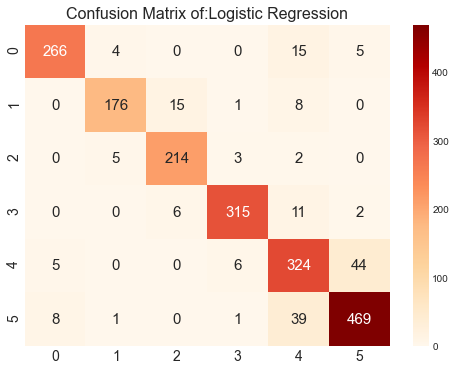

In [41]:
model_algorithm(log,X_train,y_train,X_test,y_test,'Logistic Regression')

Model: K Nearest Neighbours
Train Accuracy: 95
Test Accuracy: 89
Roc_AUC_Score: 0.9622082652132953
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       290
           1       0.84      0.93      0.88       200
           2       0.88      0.86      0.87       224
           3       0.96      0.93      0.94       334
           4       0.79      0.86      0.82       379
           5       0.93      0.84      0.88       518

    accuracy                           0.89      1945
   macro avg       0.88      0.89      0.89      1945
weighted avg       0.89      0.89      0.89      1945

Metrics of: K Nearest Neighbours
Mean Absolute Error: 0.1949
Mean Squred Error: 0.5321
Root Mean Squared Error: 0.7295


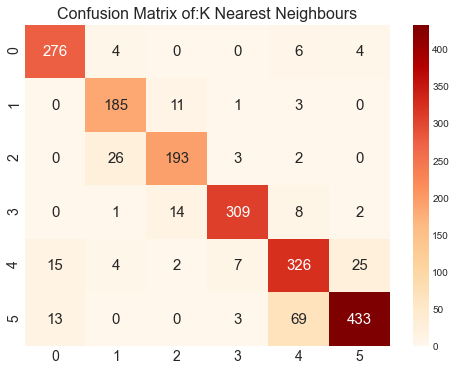

In [42]:
model_algorithm(knn,X_train,y_train,X_test,y_test,'K Nearest Neighbours')

Model: Decision Tree Classifier
Train Accuracy: 100
Test Accuracy: 88
Roc_AUC_Score: 0.9320295781482163
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       290
           1       0.88      0.89      0.89       200
           2       0.90      0.89      0.90       224
           3       0.95      0.92      0.94       334
           4       0.79      0.81      0.80       379
           5       0.87      0.88      0.88       518

    accuracy                           0.88      1945
   macro avg       0.89      0.89      0.89      1945
weighted avg       0.88      0.88      0.88      1945

Metrics of: Decision Tree Classifier
Mean Absolute Error: 0.1979
Mean Squred Error: 0.5404
Root Mean Squared Error: 0.7351


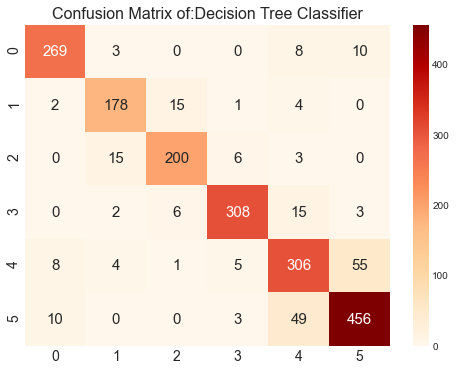

In [43]:
model_algorithm(dtree,X_train,y_train,X_test,y_test,'Decision Tree Classifier')

Model: Random Forest Classifier
Train Accuracy: 100
Test Accuracy: 91
Roc_AUC_Score: 0.9903641015632808
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       290
           1       0.92      0.92      0.92       200
           2       0.92      0.94      0.93       224
           3       0.98      0.94      0.96       334
           4       0.84      0.85      0.85       379
           5       0.89      0.91      0.90       518

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.92      1945
weighted avg       0.91      0.91      0.91      1945

Metrics of: Random Forest Classifier
Mean Absolute Error: 0.1548
Mean Squred Error: 0.4416
Root Mean Squared Error: 0.6645


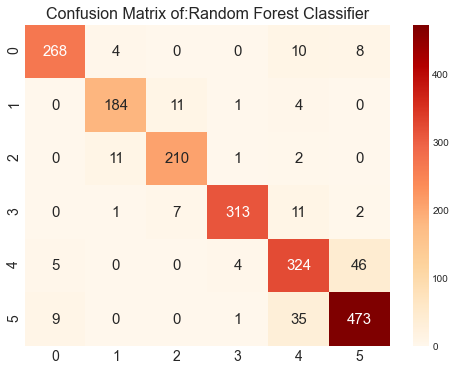

In [44]:
model_algorithm(rtree,X_train,y_train,X_test,y_test,'Random Forest Classifier')

Model: Support Vector Machine
Train Accuracy: 93
Test Accuracy: 91
Roc_AUC_Score: 0.9932118299449912
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       290
           1       0.94      0.92      0.93       200
           2       0.92      0.96      0.94       224
           3       0.96      0.94      0.95       334
           4       0.83      0.85      0.84       379
           5       0.90      0.91      0.90       518

    accuracy                           0.91      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.91      0.91      0.91      1945

Metrics of: Support Vector Machine
Mean Absolute Error: 0.1352
Mean Squred Error: 0.3347
Root Mean Squared Error: 0.5785


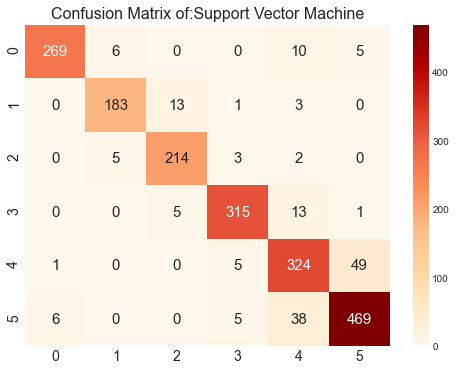

In [45]:
model_algorithm(svm,X_train,y_train,X_test,y_test,'Support Vector Machine')

Model: Naive Bayesian
Train Accuracy: 89
Test Accuracy: 89
Roc_AUC_Score: 0.987183909515082
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       290
           1       0.85      0.79      0.82       200
           2       0.83      0.90      0.86       224
           3       0.95      0.96      0.96       334
           4       0.81      0.87      0.84       379
           5       0.93      0.86      0.89       518

    accuracy                           0.89      1945
   macro avg       0.88      0.89      0.88      1945
weighted avg       0.89      0.89      0.89      1945

Metrics of: Naive Bayesian
Mean Absolute Error: 0.1871
Mean Squred Error: 0.5028
Root Mean Squared Error: 0.7091


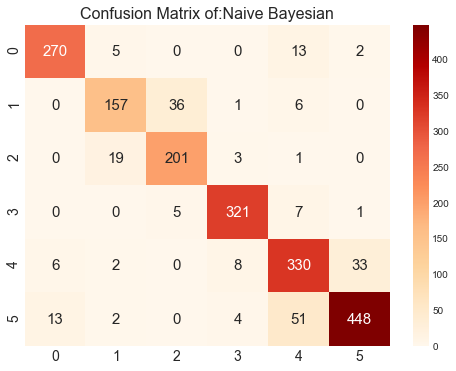

In [46]:
model_algorithm(nb,X_train,y_train,X_test,y_test,'Naive Bayesian')

Model: XGBOOST Multi Classification
Train Accuracy: 100
Test Accuracy: 91
Roc_AUC_Score: 0.9940767944356403
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       290
           1       0.96      0.92      0.94       200
           2       0.92      0.96      0.94       224
           3       0.98      0.95      0.96       334
           4       0.84      0.84      0.84       379
           5       0.89      0.91      0.90       518

    accuracy                           0.91      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.91      0.91      0.91      1945

Metrics of: XGBOOST Multi Classification
Mean Absolute Error: 0.1476
Mean Squred Error: 0.4087
Root Mean Squared Error: 0.6393


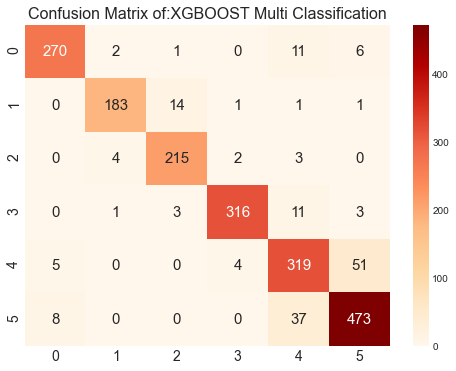

In [47]:
model_algorithm(xgb,X_train,y_train,X_test,y_test,'XGBOOST Multi Classification')

Model: Multilayer Perceptron Classifier
Train Accuracy: 91
Test Accuracy: 90
Roc_AUC_Score: 0.9910074772424621
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       290
           1       0.91      0.88      0.89       200
           2       0.88      0.92      0.90       224
           3       0.97      0.94      0.96       334
           4       0.80      0.87      0.84       379
           5       0.91      0.89      0.90       518

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945

Metrics of: Multilayer Perceptron Classifier
Mean Absolute Error: 0.1609
Mean Squred Error: 0.4242
Root Mean Squared Error: 0.6513


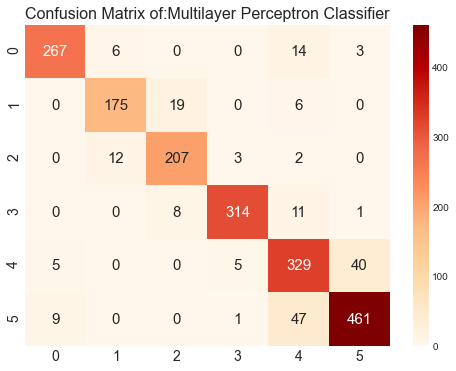

In [48]:
model_algorithm(Mlp,X_train,y_train,X_test,y_test,'Multilayer Perceptron Classifier')

In [49]:
y_pred_proba=log.predict_proba(X_test)
Roc_AUC_Score=roc_auc_score(y_test,y_pred_proba,multi_class="ovo")*100

In [50]:
Roc_AUC_Score

99.20270178099688